In [1]:
import numpy as np
import pandas as pd
import cv2
from sklearn.utils import shuffle
from glob import glob
import os
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img
import warnings
from tensorflow.keras.utils import img_to_array
from tensorflow.keras.utils import array_to_img
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers.pooling import MaxPool2D
import tensorflow.keras.applications as models
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers.experimental import preprocessing


from keras.preprocessing.image import ImageDataGenerator
from keras import layers, regularizers, optimizers, callbacks
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [2]:
pp='finalirisdataset2_original_100.499.jpg_1992b1ba-3d87-4d5a-ae60-ca2c8912284c.jpg'
pp.split('_')[2].split('.')[0]

'100'

##Data augmentation

https://github.com/mdbloice/Augmentor

In [3]:
# pip install Augmentor


In [4]:


# import Augmentor

# p=Augmentor.Pipeline(r"C:\Users\msi\PycharmProjects\iris identification\finalirisdataset2")
# # p.zoom(probability=0.3, min_factor=0.8 ,max_factor=1.5)
# # p.flip_top_bottom(probability=0.4)
# p.random_brightness(probability=0.3,min_factor=0.3,max_factor=1.2)
# # p.random_distortion(probability=0.3,grid_width=4,grid_height=4 ,magnitude=8)
# p.sample(10000)

In [5]:
count=1
data_dir= r'C:\Users\msi\PycharmProjects\iris identification\finalirisdataset2\output'
for filename in os.listdir(data_dir):
  count+=1

In [6]:
count

10001

In [7]:
identity = pd.DataFrame(columns=['image_name', 'id'])
data_dir= r'C:\Users\msi\PycharmProjects\iris identification\finalirisdataset2\output'

for filename in os.listdir(data_dir):

  id= filename.split('_')[2].split('.')[0]
  
  identity = identity.append({'image_name': str(filename), 'id': int(id)}, ignore_index=True)


identity

C:\Users\msi\AppData\Local\Temp\ipykernel_8276\1012498135.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  identity = identity.append({'image_name': str(filename), 'id': int(id)}, ignore_index=True)
C:\Users\msi\AppData\Local\Temp\ipykernel_8276\1012498135.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  identity = identity.append({'image_name': str(filename), 'id': int(id)}, ignore_index=True)
C:\Users\msi\AppData\Local\Temp\ipykernel_8276\1012498135.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  identity = identity.append({'image_name': str(filename), 'id': int(id)}, ignore_index=True)
C:\Users\msi\AppData\Local\Temp\ipykernel_8276\1012498135.py:8: FutureWarning: The frame.append method is deprecated and will b

C:\Users\msi\AppData\Local\Temp\ipykernel_8276\1012498135.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  identity = identity.append({'image_name': str(filename), 'id': int(id)}, ignore_index=True)
C:\Users\msi\AppData\Local\Temp\ipykernel_8276\1012498135.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  identity = identity.append({'image_name': str(filename), 'id': int(id)}, ignore_index=True)
C:\Users\msi\AppData\Local\Temp\ipykernel_8276\1012498135.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  identity = identity.append({'image_name': str(filename), 'id': int(id)}, ignore_index=True)
C:\Users\msi\AppData\Local\Temp\ipykernel_8276\1012498135.py:8: FutureWarning: The frame.append method is deprecated and will b

C:\Users\msi\AppData\Local\Temp\ipykernel_8276\1012498135.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  identity = identity.append({'image_name': str(filename), 'id': int(id)}, ignore_index=True)
C:\Users\msi\AppData\Local\Temp\ipykernel_8276\1012498135.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  identity = identity.append({'image_name': str(filename), 'id': int(id)}, ignore_index=True)
C:\Users\msi\AppData\Local\Temp\ipykernel_8276\1012498135.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  identity = identity.append({'image_name': str(filename), 'id': int(id)}, ignore_index=True)
C:\Users\msi\AppData\Local\Temp\ipykernel_8276\1012498135.py:8: FutureWarning: The frame.append method is deprecated and will b

C:\Users\msi\AppData\Local\Temp\ipykernel_8276\1012498135.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  identity = identity.append({'image_name': str(filename), 'id': int(id)}, ignore_index=True)
C:\Users\msi\AppData\Local\Temp\ipykernel_8276\1012498135.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  identity = identity.append({'image_name': str(filename), 'id': int(id)}, ignore_index=True)
C:\Users\msi\AppData\Local\Temp\ipykernel_8276\1012498135.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  identity = identity.append({'image_name': str(filename), 'id': int(id)}, ignore_index=True)
C:\Users\msi\AppData\Local\Temp\ipykernel_8276\1012498135.py:8: FutureWarning: The frame.append method is deprecated and will b

C:\Users\msi\AppData\Local\Temp\ipykernel_8276\1012498135.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  identity = identity.append({'image_name': str(filename), 'id': int(id)}, ignore_index=True)
C:\Users\msi\AppData\Local\Temp\ipykernel_8276\1012498135.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  identity = identity.append({'image_name': str(filename), 'id': int(id)}, ignore_index=True)
C:\Users\msi\AppData\Local\Temp\ipykernel_8276\1012498135.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  identity = identity.append({'image_name': str(filename), 'id': int(id)}, ignore_index=True)
C:\Users\msi\AppData\Local\Temp\ipykernel_8276\1012498135.py:8: FutureWarning: The frame.append method is deprecated and will b

C:\Users\msi\AppData\Local\Temp\ipykernel_8276\1012498135.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  identity = identity.append({'image_name': str(filename), 'id': int(id)}, ignore_index=True)
C:\Users\msi\AppData\Local\Temp\ipykernel_8276\1012498135.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  identity = identity.append({'image_name': str(filename), 'id': int(id)}, ignore_index=True)
C:\Users\msi\AppData\Local\Temp\ipykernel_8276\1012498135.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  identity = identity.append({'image_name': str(filename), 'id': int(id)}, ignore_index=True)
C:\Users\msi\AppData\Local\Temp\ipykernel_8276\1012498135.py:8: FutureWarning: The frame.append method is deprecated and will b

C:\Users\msi\AppData\Local\Temp\ipykernel_8276\1012498135.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  identity = identity.append({'image_name': str(filename), 'id': int(id)}, ignore_index=True)
C:\Users\msi\AppData\Local\Temp\ipykernel_8276\1012498135.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  identity = identity.append({'image_name': str(filename), 'id': int(id)}, ignore_index=True)
C:\Users\msi\AppData\Local\Temp\ipykernel_8276\1012498135.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  identity = identity.append({'image_name': str(filename), 'id': int(id)}, ignore_index=True)
C:\Users\msi\AppData\Local\Temp\ipykernel_8276\1012498135.py:8: FutureWarning: The frame.append method is deprecated and will b

,image_name,id
0,finalirisdataset2_original_1.1.jpg_4e43f624-e0...,1
1,finalirisdataset2_original_1.1.jpg_5ecc8ea7-25...,1
2,finalirisdataset2_original_1.1.jpg_bcfd2701-74...,1
3,finalirisdataset2_original_1.1.jpg_f5239d3b-3a...,1
4,finalirisdataset2_original_1.2.jpg_3022535a-36...,1
...,...,...
9995,finalirisdataset2_original_99.498.jpg_3bf1ac6b...,99
9996,finalirisdataset2_original_99.498.jpg_53a835c7...,99
9997,finalirisdataset2_original_99.498.jpg_630e312d...,99
9998,finalirisdataset2_original_99.498.jpg_ddbad0ce...,99


In [8]:
y= identity['id']
y_set = set(y)
number_of_unique_values = len(y_set)
print('number of identities in our dataset:',number_of_unique_values)
print(y.shape)

number of identities in our dataset: 373
(10000,)


In [9]:
y=pd.get_dummies(y)

C:\Users\msi\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [10]:
# y=to_categorical(y, num_classes=number_of_unique_values)

In [11]:
y.shape

(10000, 373)

In [12]:
img_size=170
def load_images_OpenCv(images, data_dir):
    
    for filename in os.listdir(data_dir):
        img = cv2.imread(os.path.join(data_dir,filename),cv2.COLOR_BGR2RGB)

        
        img_resize = cv2.resize(img, (img_size, img_size))
        if img is not None:
            images.append(img_resize)
    return images

In [13]:
images = []

images = load_images_OpenCv(images, data_dir)

np.shape(images)

(10000, 170, 170, 3)

In [14]:
images=np.asarray(images)
images.shape

(10000, 170, 170, 3)

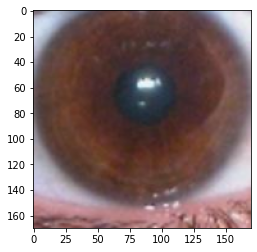

In [15]:
imgplot = plt.imshow(images[8957])
img=images[1027]


In [16]:
identity.iloc[8957]


image_name    finalirisdataset2_original_64.317.jpg_33c875ab...
id                                                           64
Name: 8957, dtype: object

In [17]:
images[0].shape

(170, 170, 3)

In [18]:
X = images[:,:,:,:].astype('float32') / 255
X.shape

(10000, 170, 170, 3)

In [19]:
print('shape of images:', X.shape, '\nshape of labels:',y.shape)

shape of images: (10000, 170, 170, 3) 
shape of labels: (10000, 373)


In [20]:
X, y = shuffle(X, y)
print('shape of images:', X.shape, '\nshape of labels:',y.shape)

shape of images: (10000, 170, 170, 3) 
shape of labels: (10000, 373)


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=True)
print('number of images for train:',X_train.shape[0],
      '\nnumber of images for test:', X_test.shape[0])

number of images for train: 8000 
number of images for test: 2000


In [22]:
final_Dense_units = [y.shape[0],y.shape[1]]

In [23]:
final_Dense_units[1]

373

In [24]:
# from pandas.core.dtypes.common import classes
base_model = keras.applications.EfficientNetB2(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(170, 170, 3),
    include_top=False,classes=number_of_unique_values)  # Do not include the ImageNet classifier at the top.

In [25]:
base_model.trainable = False

for layer in base_model.layers[:-5]:   #n laye akhar freez nashe
    layer.trainable = True

In [26]:
from keras import layers

In [26]:
# model = Sequential()
# # model.add(base_model)
# model.add(keras.layers.Conv2D(66,(3,3),input_shape=(170, 170, 3)))
# model.add(keras.layers.BatchNormalization())
# model.add(keras.layers.GlobalAveragePooling2D())
# model.add(keras.layers.Dropout(0.2))
# model.add(keras.layers.Flatten())
# model.add(keras.layers.Dense(212, activation='relu'))
# model.add(keras.layers.Dropout(0.2))
# model.add(keras.layers.Dense(226, activation='relu'))
# model.add(keras.layers.Dense(number_of_unique_values, activation='softmax'))

In [27]:
# model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy']) #compiling the  model

In [28]:
# history=model.fit(X_train, y_train, batch_size=8, epochs=30, verbose=1, validation_data=(X_test, y_test))
# score = model.evaluate(X_test, y_test)
# print('Test score:', score[0])
# print('Test accuracy:', score[1])

In [29]:
nets = 1
model = [0] * nets
final_Dense_units = [y.shape[0],y.shape[1]]
model_name = ['IrisID_Mod']
for i in range(nets):
    model[i] = Sequential(name=model_name[i])
    model[i].add(base_model)

    model[i].add(layers.Conv2D(60, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model[i].add(layers.BatchNormalization())
    model[i].add(layers.MaxPool2D((2, 2)))
#     model[i].add(layers.Conv2D(64,(3 ,3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
#     model[i].add(layers.BatchNormalization())
#     model[i].add(layers.MaxPool2D((1, 1)))
    # model[i].add(layers.Conv2D(50,(3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    # model[i].add(layers.BatchNormalization())
    # model[i].add(layers.MaxPool2D((2, 2)))
    # model[i].add(layers.Dropout(0.3))
    model[i].add(layers.Flatten())
    model[i].add(layers.Dense(50, activation='relu'))
    model[i].add(layers.Dropout(0.4))
    # model[i].add(layers.Dense(50, activation='relu'))
    # model[i].add(layers.Dropout(0.4))
    model[i].add(layers.Dense(final_Dense_units[1], activation='softmax'))

    # Complete with Adam optimizer and entropy cost
    model[i].compile(optimizer=Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])
    model[i].summary()

Model: "IrisID_Mod"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb2 (Functional)  (None, 6, 6, 1408)       7768569   
                                                                 
 conv2d (Conv2D)             (None, 4, 4, 60)          760380    
                                                                 
 batch_normalization (BatchN  (None, 4, 4, 60)         240       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 2, 2, 60)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 240)               0         
                                                                 
 dense (Dense)               (None, 50)                1

In [31]:
pip install graphviz


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: C:\Users\msi\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [32]:
pip install pydot


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: C:\Users\msi\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [33]:
pip install pydotplus


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: C:\Users\msi\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [34]:
#Plot Id model graph in layers
plot_model(model[0], show_shapes=True, show_layer_names=True)



You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [36]:
history = [0] * nets
CallBack = [0] * nets
ReduceLR_minlr = [1e-9, 1e-7]
epochs = 100
batch_size = 16
for i in range(nets):
    CallBack[i] = [
        callbacks.EarlyStopping(monitor='val_accuracy', patience=10, mode='max', verbose=1),
        callbacks.ReduceLROnPlateau(factor=0.1, patience=1, min_lr=ReduceLR_minlr[i], verbose=1)]
#         callbacks.TensorBoard(log_dir="./log_dir/"+model_name[i])]
history[0] = model[0].fit(X_train, y_train,
                    batch_size = batch_size,
                    epochs = epochs, 
                    validation_data = (X_test, y_test),
                    verbose = 1, callbacks= CallBack[0])
model[0].save(r'C:\Users\msi\Desktop\پروژه ها\سونیا حسینی\iris.h5')
# Load the TensorBoard notebook extension
# %load_ext tensorboard
# Launch TensorBoard
# Supervising the SubjectID model
# %tensorboard --logdir '/content/log_dir/IrisID_Mod'
# or, supervising the fingerNum model
# %tensorboard --logdir './log_dir/fingerNum_log'

Epoch 1/100
500/500 [==============================] - 105s 180ms/step - loss: 4.9604 - accuracy: 0.1235 - val_loss: 5.4353 - val_accuracy: 0.0580 - lr: 0.0010
Epoch 2/100
500/500 [==============================] - 110s 221ms/step - loss: 2.9685 - accuracy: 0.4112 - val_loss: 1.4398 - val_accuracy: 0.8290 - lr: 0.0010
Epoch 3/100
500/500 [==============================] - 110s 221ms/step - loss: 2.3963 - accuracy: 0.5631 - val_loss: 1.1535 - val_accuracy: 0.9030 - lr: 0.0010
Epoch 4/100
500/500 [==============================] - 111s 222ms/step - loss: 2.1337 - accuracy: 0.6323 - val_loss: 1.1098 - val_accuracy: 0.9330 - lr: 0.0010
Epoch 5/100
500/500 [==============================] - 111s 221ms/step - loss: 2.0035 - accuracy: 0.6776 - val_loss: 1.0981 - val_accuracy: 0.9425 - lr: 0.0010
Epoch 6/100
500/500 [==============================] - 111s 223ms/step - loss: 1.9834 - accuracy: 0.6950 - val_loss: 1.0920 - val_accuracy: 0.9540 - lr: 0.0010
Epoch 7/100
500/500 [===================

In [ ]:
model[0].save('/content/drive/MyDrive/image processing/iris.h5')

In [ ]:
# # Load the TensorBoard notebook extension
# %load_ext tensorboard
# # Launch TensorBoard
# # Supervising the SubjectID model
# %tensorboard --logdir '/content/log_dir/IrisID_Mod'
# # or, supervising the fingerNum model
# # %tensorboard --logdir './log_dir/fingerNum_log'

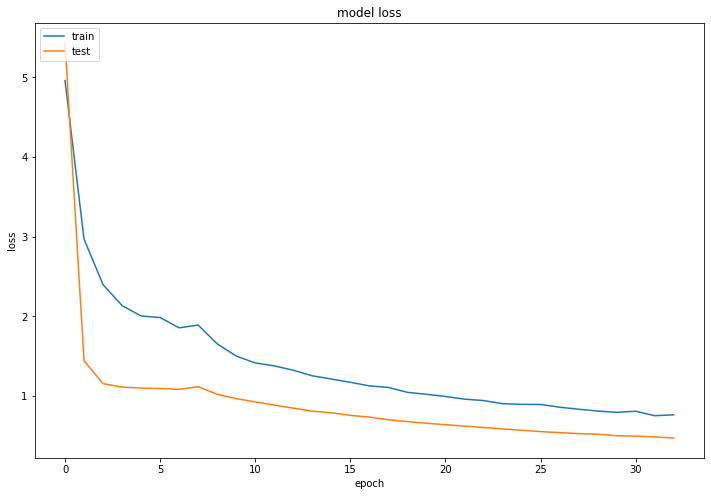

In [37]:
plt.figure(figsize=(12,8))
plt.plot(history[0].history['loss'])
plt.plot(history[0].history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

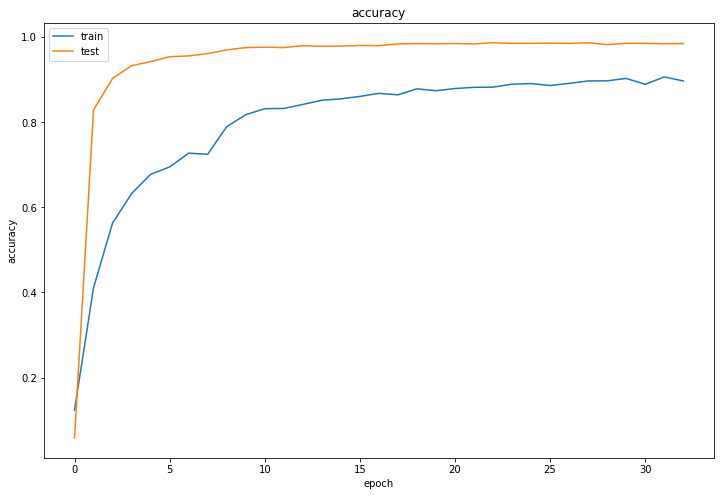

In [38]:
plt.figure(figsize=(12,8))
plt.plot(history[0].history['accuracy'])
plt.plot(history[0].history['val_accuracy'])
plt.title('accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [27]:
from sklearn.metrics import accuracy_score , precision_score , f1_score , recall_score


In [28]:
y_test=np.array(y_test)

In [29]:
y_class=np.argmax(y_test,axis=1)

In [30]:
y_class

array([ 58, 205, 302, ...,  23, 139, 327], dtype=int64)

In [32]:
from keras.models import load_model
model=load_model(r'C:\Users\msi\Desktop\پروژه ها\سونیا حسینی\iris.h5')

In [33]:
y_pred=model.predict(X_test)

63/63 [==============================] - 11s 57ms/step


In [34]:
y_pred=np.argmax(y_pred,axis=1)

In [35]:
y_pred

array([ 58, 205, 302, ...,  23, 139, 327], dtype=int64)

In [36]:
y_pred_encod=pd.get_dummies(y_pred)

In [37]:
y_pred_encod

,0,1,2,3,4,5,6,7,8,9,...,363,364,365,366,367,368,369,370,371,372
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
acc=accuracy_score(y_class, y_pred)
recal=recall_score(y_class, y_pred,average='weighted')
precision=precision_score(y_class, y_pred,average='weighted')
f1score=f1_score(y_class, y_pred,average='weighted')
                

C:\Users\msi\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [39]:
print('Accuracy is  '+str(acc) ,end='\n' )
print('Precision is  '+str(precision), end='\n' )
print('Recall is  '+str(recal) ,end='\n' )
print('F1 Score is  '+str(f1score) ,end='\n' )

Accuracy is  0.9965
Precision is  0.9967101190476191
Recall is  0.9965
F1 Score is  0.9963273626957837
